Import and Dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

students = pd.read_csv('Student_Performance.csv')
students

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Import Sklearn Models and Preprocessors


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


Encode string values 'Yes' and 'No

In [33]:
encoder = LabelEncoder()
scaler = StandardScaler()

X = students.iloc[:, :-1].values
y = students.iloc[:, -1].values

X[:, 2] = encoder.fit_transform(X[:, 2])

Scale values using standard scaler

In [25]:
### IF NECESSARY ###
# X = scaler.fit_transform(X)
# y = scaler.fit_transform(y.reshape(-1,1))

Split the data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Fit models

In [45]:
multi_regressor = LinearRegression()

multi_poly_regressor = LinearRegression()
poly_regressor  = PolynomialFeatures(degree=5)
X_poly = poly_regressor.fit_transform(X_train)


sup_vec         = SVR(kernel='rbf')


dec_tree        = DecisionTreeRegressor()


rand_forest     = RandomForestRegressor(n_estimators=5, random_state=0)

In [46]:
multi_regressor.fit(X_train, y_train)

multi_poly_regressor.fit(X_poly, y_train)

sup_vec.fit(X_train, y_train)

dec_tree.fit(X_train, y_train)

rand_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=0)

Predictions using using X_test

In [50]:
y_pred_multi = multi_regressor.predict(X_test)
y_pred_poly  = multi_poly_regressor.predict(poly_regressor.fit_transform(X_test))
y_pred_svr   = sup_vec.predict(X_test)
y_pred_dec   = dec_tree.predict(X_test)
y_pred_rf    = rand_forest.predict(X_test)
# print(np.concatenate((y_pred_multi.reshape(len(y_pred_multi),1), y_test.reshape(len(y_test),1)),1))
predictions = [y_pred_multi, y_pred_poly, y_pred_svr, y_pred_dec, y_pred_rf]
    

Analysis

In [80]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import math

maxY = max(y_test)
minY = min(y_test)

normalize = maxY - minY 

for _ in predictions:
    r_squared = r2_score(y_test, _)
    print(f"The R-squared value is:                             {r_squared}")
    
    mean_squared = mean_squared_error(y_test, _)
    print(f"The Mean Squared Error value is:                    {mean_squared}")
    
    root_mean_squared = math.sqrt(mean_squared)
    print(f"The Root Mean Squared Error value is:               {root_mean_squared}")
    
    normalized_root_mean_squared = (root_mean_squared / normalize)*100
    print(f"The Normalized Root Mean Squared Error value is:    {normalized_root_mean_squared}")
    
    mean_abs_error = mean_absolute_percentage_error(y_test, _)*100
    print(f"The Mean Absolute Error value is:                   {mean_abs_error}\n")
    

The R-squared value is:                             0.9880686410711422
The Mean Squared Error value is:                    4.105609215835835
The Root Mean Squared Error value is:               2.0262302968408687
The Normalized Root Mean Squared Error value is:    2.2766632548773806
The Mean Absolute Error value is:                   3.398223731028275

The R-squared value is:                             0.9874835037589755
The Mean Squared Error value is:                    4.3069563679653795
The Root Mean Squared Error value is:               2.075320786761743
The Normalized Root Mean Squared Error value is:    2.3318211087210594
The Mean Absolute Error value is:                   3.489597091401369

The R-squared value is:                             0.9844205065521452
The Mean Squared Error value is:                    5.360941051137266
The Root Mean Squared Error value is:               2.315370607729412
The Normalized Root Mean Squared Error value is:    2.6015400086847325
The Mean A

Scatter Plots

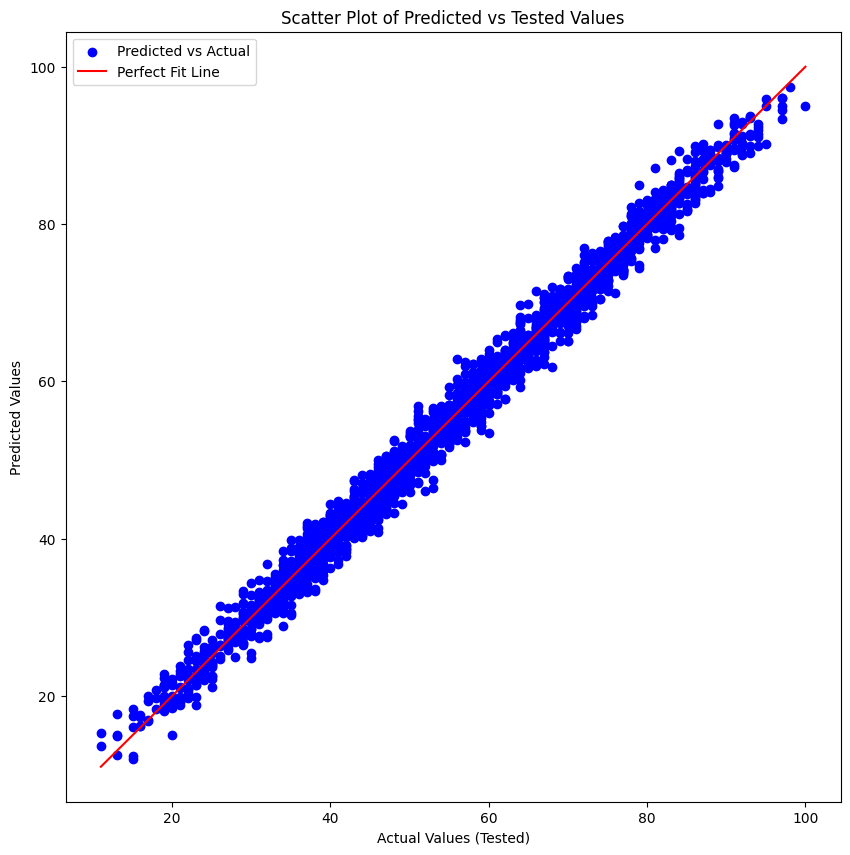

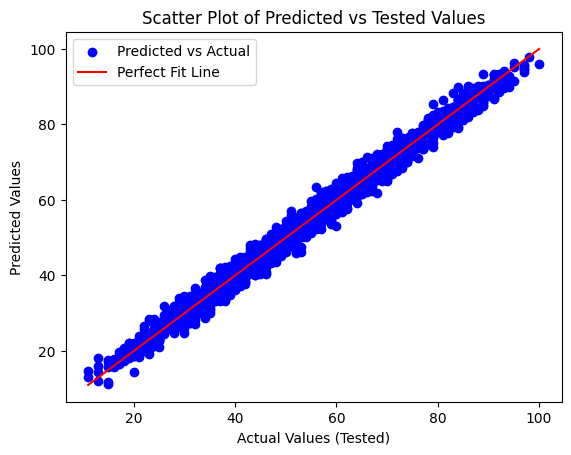

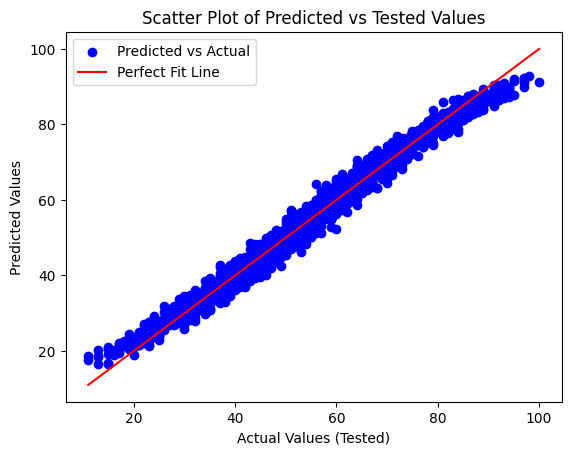

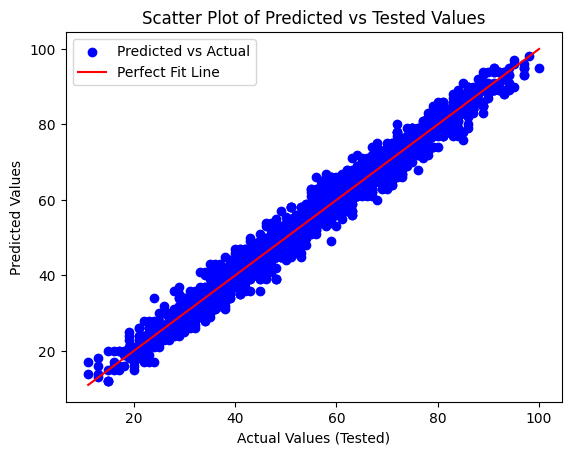

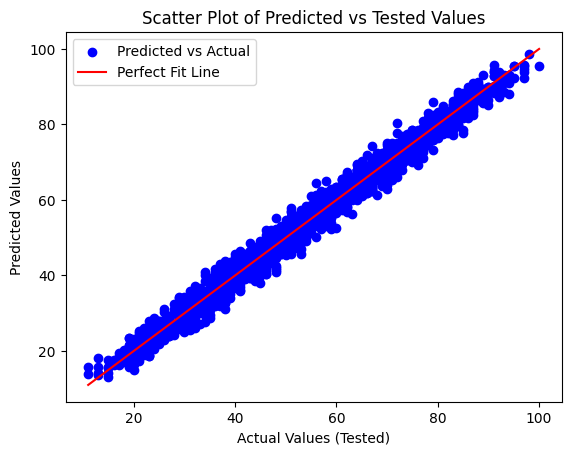

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in predictions:
    plt.scatter(y_test, i, color='blue', label='Predicted vs Actual')
    
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit Line')
    
    plt.xlabel('Actual Values (Tested)')
    plt.ylabel('Predicted Values')
    plt.title('Scatter Plot of Predicted vs Tested Values')
    plt.legend()
    plt.savefig(f'scatter_plot{i + 1}.jpg',format='jpg')

    plt.show()
    
    